# AIM: To build a predictive model and find out the sales of each product at a particular store.

## Loading Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv("Train.csv")

In [3]:
test=pd.read_csv("Test.csv")

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [6]:
train['category']='train'
test['category']='test'
sales = pd.concat([train, test],ignore_index=True)
print (sales.shape, test.shape, train.shape)

(14204, 13) (5681, 12) (8523, 13)


In [7]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [8]:
train.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049 

In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
sales.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
category                        0
dtype: int64

# Exploratory Data Analysis

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


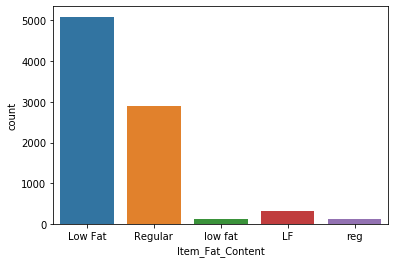

In [11]:
sns.countplot(x="Item_Fat_Content",data=train)
print(train['Item_Fat_Content'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


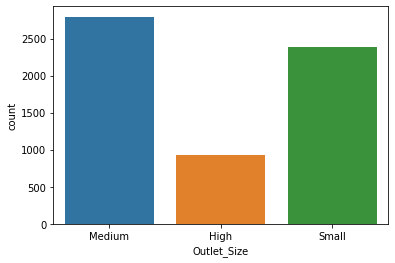

In [12]:
print(train['Outlet_Size'].value_counts())
sns.countplot(x="Outlet_Size",data=train)

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


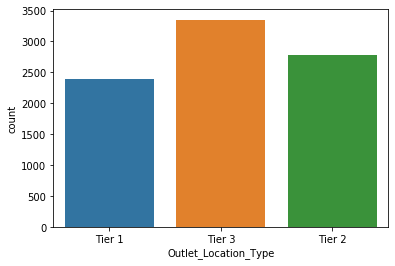

In [13]:
sns.countplot(x="Outlet_Location_Type",data=train)
print(train['Outlet_Location_Type'].value_counts())

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


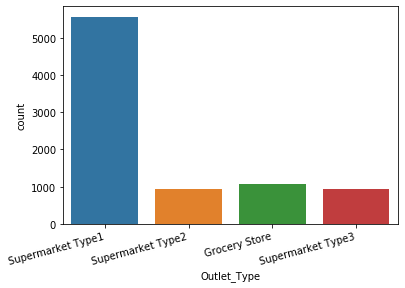

In [14]:
g2=sns.countplot(x="Outlet_Type",data=train)
g2.set_xticklabels(g2.get_xticklabels(), rotation = 15,horizontalalignment='right')
print(train['Outlet_Type'].value_counts())

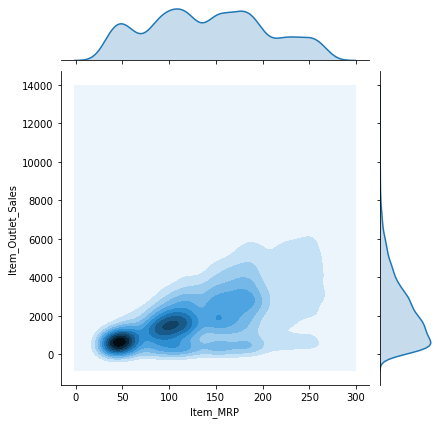

In [15]:
sns.jointplot("Item_MRP", "Item_Outlet_Sales",data=train,kind='kde')

Text(0.5, 1.0, ' Item type vs Item MRP ')

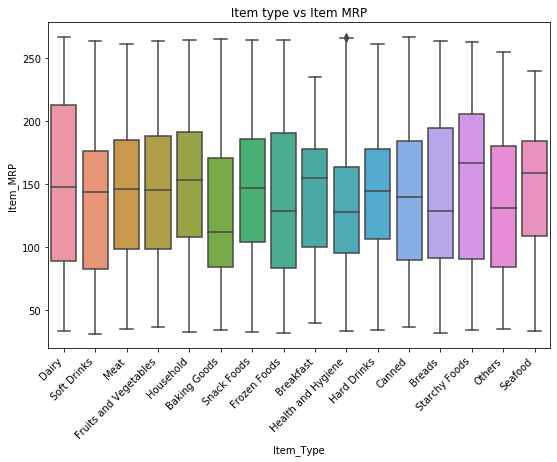

In [16]:
plt.figure(figsize=(9,6))
g2=sns.boxplot(x="Item_Type", y="Item_MRP",data=train)
g2.set_xticklabels(g2.get_xticklabels(),rotation = 45,horizontalalignment='right')
plt.title(" Item type vs Item MRP ")

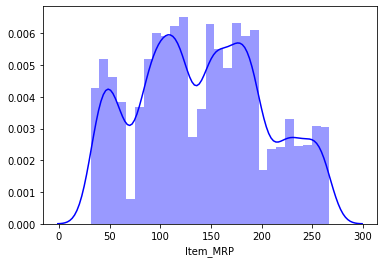

In [17]:
sns.distplot(train.Item_MRP,kde=True,color="b")

Text(0.5, 1.0, ' Item_Type vs Item_Outlet_Sales')

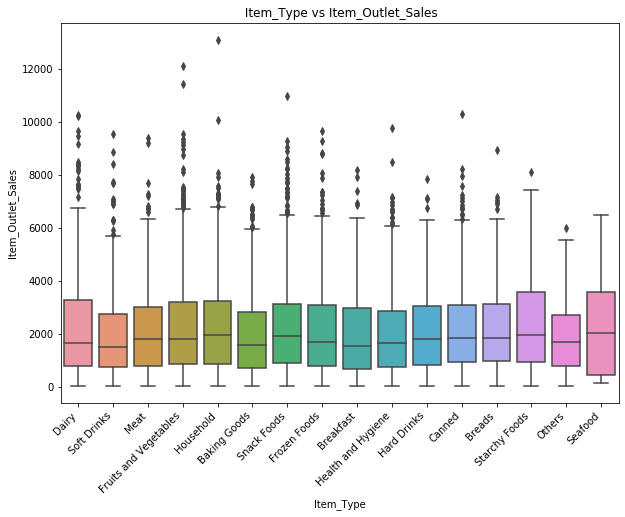

In [18]:
plt.figure(figsize=(10,7))
graph1=sns.boxplot(x="Item_Type",y="Item_Outlet_Sales",data=train)
graph1.set_xticklabels(graph1.get_xticklabels(), rotation = 45,horizontalalignment='right')
plt.title(" Item_Type vs Item_Outlet_Sales")

Text(0.5, 1.0, ' Item type ')

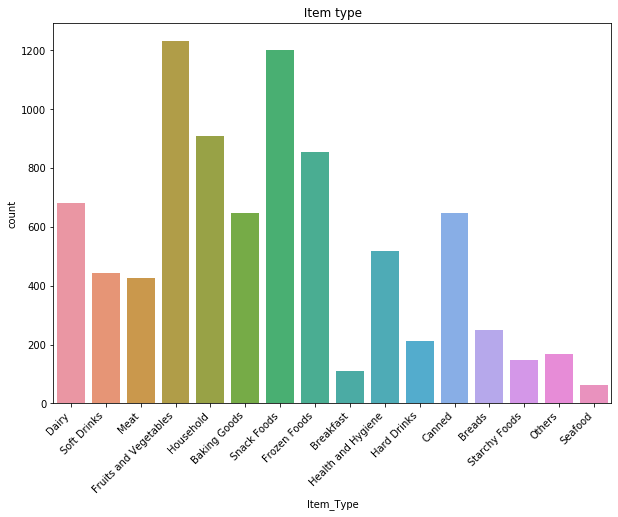

In [19]:
plt.figure(figsize=(10,7))
graph1=sns.countplot(x="Item_Type",data=train)
graph1.set_xticklabels(graph1.get_xticklabels(), rotation = 45,horizontalalignment='right')
plt.title(" Item type ")

Text(0.5, 1.0, 'Outlet_Type vs Item_Outlet_Sales')

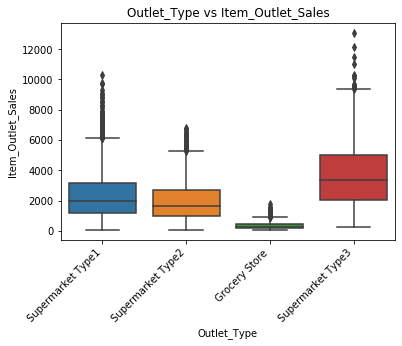

In [20]:
plt.figure(figsize=(6,4))
graph1=sns.boxplot(x="Outlet_Type",y="Item_Outlet_Sales",data=train)
graph1.set_xticklabels(graph1.get_xticklabels(), rotation = 45,horizontalalignment='right')
plt.title("Outlet_Type vs Item_Outlet_Sales")

# DATA PREPROCESSING

In [21]:
sales['Item_Weight']=sales['Item_Weight'].fillna(sales['Item_Weight'].mean())

In [22]:
from scipy.stats import mode

sales['Outlet_Size']=sales['Outlet_Size'].fillna(sales['Outlet_Size'].mode().iloc[0])

In [23]:
sales.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
category                        0
dtype: int64

In [24]:
print(sales['Item_Identifier'].value_counts())

FDT27    10
DRK49    10
FDZ12    10
FDM20    10
FDQ08    10
         ..
FDH58     7
FDM10     7
NCL42     7
FDO33     7
FDX49     7
Name: Item_Identifier, Length: 1559, dtype: int64


In [25]:
sales['Outlet_Years'] = 2013 - sales['Outlet_Establishment_Year']

In [26]:
print(sales['Outlet_Identifier'].value_counts())

OUT027    1559
OUT013    1553
OUT035    1550
OUT046    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64


In [27]:
sales['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [28]:
sales['Item_Fat_Content'] = sales['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
print(sales['Item_Fat_Content'].value_counts())

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


# FEATURE ENGINEERING

### One Hot encoding

In [29]:
sales=pd.get_dummies(sales,columns=['Item_Type','Outlet_Location_Type','Outlet_Type','Item_Fat_Content','Outlet_Size'])

In [30]:
sales.dtypes

Item_Identifier                     object
Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Identifier                   object
Outlet_Establishment_Year            int64
Item_Outlet_Sales                  float64
category                            object
Outlet_Years                         int64
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_S

### Label encoding

In [31]:
#Item_Identifier and outlet_Identifier are also useful for making prediction
from sklearn.preprocessing import LabelEncoder
num=LabelEncoder()
sales['Outlet']=num.fit_transform(sales['Outlet_Identifier'])
sales['Identifier']=num.fit_transform(sales['Item_Identifier'])

In [32]:
sales.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,category,Outlet_Years,Item_Type_Baking Goods,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet,Identifier
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,train,14,0,...,1,0,0,1,0,0,1,0,9,156
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,train,4,0,...,0,1,0,0,1,0,1,0,3,8
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,train,14,0,...,1,0,0,1,0,0,1,0,9,662
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,732.3800,train,15,0,...,0,0,0,0,1,0,1,0,0,1121
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,994.7052,train,26,0,...,1,0,0,1,0,1,0,0,1,1297


In [33]:
sales.dtypes

Item_Identifier                     object
Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Identifier                   object
Outlet_Establishment_Year            int64
Item_Outlet_Sales                  float64
category                            object
Outlet_Years                         int64
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_S

In [34]:
sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'category', 'Outlet_Years', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outle

In [35]:
sales['Item_Visibility']

0        0.016047
1        0.019278
2        0.016760
3        0.000000
4        0.000000
           ...   
14199    0.013496
14200    0.142991
14201    0.073529
14202    0.000000
14203    0.104720
Name: Item_Visibility, Length: 14204, dtype: float64

In [36]:
#Divide into test and train:
train = sales.loc[sales['category']=="train"]
test = sales.loc[sales['category']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','category'],axis=1,inplace=True)
train.drop(['category'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

C:\Users\Shubh\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# DATA MODELLING

In [37]:
train_model=pd.read_csv('train_modified.csv')

In [38]:
train_model.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet,Identifier
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,14,0,0,...,1,0,0,1,0,0,1,0,9,156
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,4,0,0,...,0,1,0,0,1,0,1,0,3,8
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,14,0,0,...,1,0,0,1,0,0,1,0,9,662
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,732.3800,15,0,0,...,0,0,0,0,1,0,1,0,0,1121
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,994.7052,26,0,0,...,1,0,0,1,0,1,0,0,1,1297


In [39]:
train_model.shape

(8523, 38)

In [40]:
train_model.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Outlet_Years', 'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet',
       'Identif

In [41]:
X=train_model.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],axis=1)

In [42]:
y=train_model['Item_Outlet_Sales']

In [43]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [44]:
from sklearn.model_selection import KFold,train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Linear Regression

In [46]:
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
y_pred=model.predict(X_test)

In [48]:
y_pred

array([1354.26089453,  703.16781773,  847.79410303, ...,  820.09919209,
        591.60548781, 1682.33613198])

In [49]:
from sklearn import metrics

np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1069.7153798211723

In [50]:
from sklearn.model_selection import cross_val_score

lr=LinearRegression()
c=111111111111111111111
d=0
for i in range(3,15):
    sc=cross_val_score(lr, X, y, cv=i, scoring='neg_root_mean_squared_error')

    sc=-sc
    print('Root mean squared error of the model for kfolds',i,' is ',sc.mean())
    if sc.mean()<c:
        c=sc.mean()
        d=i
print('\n\n\n\nBest number of kfolds for cross validation is ',d,'\n\n\n\n')


list.append(c)

Root mean squared error of the model for kfolds 3  is  1133.7796242590978
Root mean squared error of the model for kfolds 4  is  1134.696925271438
Root mean squared error of the model for kfolds 5  is  1132.7717901180745
Root mean squared error of the model for kfolds 6  is  1132.4110199818203
Root mean squared error of the model for kfolds 7  is  1131.554783209491
Root mean squared error of the model for kfolds 8  is  1131.7281339538404
Root mean squared error of the model for kfolds 9  is  1131.7397025116454
Root mean squared error of the model for kfolds 10  is  1132.1532587972329
Root mean squared error of the model for kfolds 11  is  1131.5272818081723
Root mean squared error of the model for kfolds 12  is  1131.3377021770993
Root mean squared error of the model for kfolds 13  is  1131.5778141946928
Root mean squared error of the model for kfolds 14  is  1131.4197166152812




Best number of kfolds for cross validation is  12 






TypeError: descriptor 'append' requires a 'list' object but received a 'numpy.float64'

### Regularized Linear Regression

In [51]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [52]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train,pred_train_rr)))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred_test_rr))) 

1141.3987914916424
1069.7134265872414


In [53]:
model_lasso = Lasso(alpha=0.05)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train,pred_train_lasso)))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred_test_lasso))) 

1141.411688263805
1069.5857085417967


C:\Users\Shubh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3481095283.1285295, tolerance: 2016798.6508341574
  positive)


### RandomForest

In [54]:
from sklearn.ensemble import RandomForestRegressor

rfg=RandomForestRegressor()
rfg.fit(X_train,y_train)
rfg_train_predict=rfg.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train,rfg_train_predict)))

rfg_test_predict=rfg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,rfg_test_predict)))



430.3685966907478
1093.1632935509497


### XGBoost

In [55]:
from xgboost import XGBRegressor

model1 = XGBRegressor(n_estimators=1000, learning_rate=0.02,random_state=42)
model1.fit(X_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [56]:
y_pred1=model1.predict(X_test)

In [57]:
np.sqrt(metrics.mean_squared_error(y_pred1,y_test))

1086.0191469257325

## Loading Test Data

In [58]:
test_model=pd.read_csv("test_modified.csv")

In [59]:
predictors=test_model.drop(["Item_Identifier","Outlet_Identifier"],axis=1)

### Predicting with lowest rmse model i.e Linear Regression

In [60]:
y_pred2=model.predict(predictors)

In [61]:
y_pred2

array([1858.40092322, 1496.87896143, 1844.56693591, ..., 1865.37930995,
       3567.15088817, 1317.25405714])